<a href="https://colab.research.google.com/github/EmilHJ98/ai-ml-principles-exercises/blob/main/ML-training/cv-crash-coursedigit_classification_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

In [2]:
import sklearn.datasets as datasets

In [3]:
data = datasets.load_digits()

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
len(data.images)

1797

In [8]:
data.images[0].shape

(8, 8)

In [9]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
data.target[0]

0

4


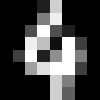

In [25]:
from PIL import Image
import numpy as np

i = 100
print(data.target[i])
Image.fromarray((data.images[i] / 16 * 255). astype(np.uint8), "L").resize((100, 100), resample=Image.NEAREST)

In [28]:
data.images.reshape((len(data.images), -1)).shape

(1797, 64)

#Train a model





In [27]:
from sklearn.model_selection import train_test_split

In [29]:
flat_dataset = data.images.reshape((len(data.images), -1))
X_train, X_test, y_train, y_test = train_test_split(flat_dataset, data.target, train_size=0.8)

In [30]:
X_train.shape

(1437, 64)

8


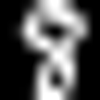

In [38]:
print(y_test[100])
Image.fromarray((X_test[100].reshape((8,8))/ 16 * 255).astype(np.uint8), "L").resize((100,100))


In [41]:
from sklearn import svm


In [42]:
model = svm.SVC(gamma=0.001)
model.fit(X_train, y_train)

SVC(gamma=0.001)

In [49]:
model.predict(X_train[0:10])

array([3, 6, 1, 6, 5, 7, 4, 8, 4, 8])

In [51]:
y_test[0:10]

array([5, 0, 2, 2, 5, 9, 3, 5, 2, 5])

In [52]:
from sklearn import metrics
predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        42
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        32

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360



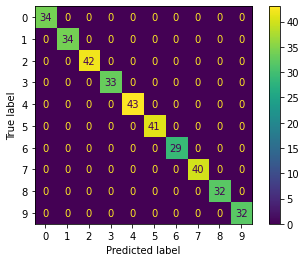

In [53]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)